In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np, pandas as pd, os
from prettytable import PrettyTable

In [9]:
feature_names = list()
for index in range(1, 6):
    feature_names.extend(["Suit"+str(index), "Rank"+str(index)])

feature_names.append('class')


training_input_file = os.path.abspath('poker-hand-training-true.csv')
testing_input_file = os.path.abspath('poker-hand-testing.csv')


np.random.seed(350)     # seed for reproducible results

# To store configs
class myConfigs:
    features = 0
    classes = 0


config = myConfigs()


In [10]:
train_data = pd.read_csv(training_input_file, names=feature_names)
test_data = pd.read_csv(testing_input_file, names=feature_names)

# Get features of data
config.features = len(train_data.columns) - 1
config.classes = len(set(train_data['class']))

# Shuffle training data
train_data = train_data.sample(frac=1).reset_index(drop=True)

# Seperate data and classes
train_y = np.array(train_data['class'])
train_x = np.array(train_data.drop('class', 1))

test_y = np.array(test_data['class'])
test_x = np.array(test_data.drop('class', 1))

# Initialise scaler to scale the data
scaler = StandardScaler()

train_set = np.empty(train_x.shape, dtype = float)
test_set = np.empty(test_x.shape, dtype = float)

# Make training data suitable for scaling
for index in range(len(train_x)):
    train_set[index] = train_x[index].astype(float)

# Make testing data suitable for scaling
for index in range(len(test_x)):
    test_set[index] = test_x[index].astype(float)

# Fit the training data
scaler.fit(train_set)  

# Scale the training and testing data w.r.t scaler
data_train = scaler.transform(train_set)
data_test = scaler.transform(test_set)


In [11]:
rforest = RandomForestClassifier()
rforest.fit(data_train, train_y)

prediction = rforest.predict(data_test)
accuracy = accuracy_score(test_y, prediction)

In [12]:
print("\nAccuracy using Random Forest Classifier :", round(accuracy * 100, 3),"%\n")


Accuracy using Random Forest Classifier : 56.541 %



Accuracy : 56.541


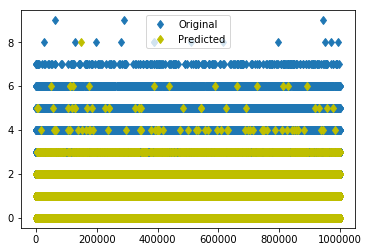

In [13]:
print("Accuracy :", round(accuracy * 100, 3))
plt.plot(test_y, 'd', label = "Original")
plt.plot(prediction, 'yd', label = "Predicted")
plt.legend()
plt.show()

In [14]:
preds = prediction
confMat = [[0] * config.classes for x in range(config.classes)]

for i in range(len(preds)):
    predLabel = preds[i]
    actLabel = test_y[i]
    confMat[actLabel][predLabel] += 1

header = [""]
for l in range(config.classes):
    header.append("Pred " + str(l))
    
tab = PrettyTable(header)
l = 0
for c in confMat:
    tab.add_row(["Real " + str(l)] + c)
    l += 1

print(tab)

+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|        | Pred 0 | Pred 1 | Pred 2 | Pred 3 | Pred 4 | Pred 5 | Pred 6 | Pred 7 | Pred 8 | Pred 9 |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| Real 0 | 376514 | 124200 |  424   |   63   |   4    |   4    |   0    |   0    |   0    |   0    |
| Real 1 | 232269 | 187795 |  1976  |  411   |   37   |   5    |   5    |   0    |   0    |   0    |
| Real 2 | 17800  | 28806  |  879   |  127   |   4    |   0    |   6    |   0    |   0    |   0    |
| Real 3 |  6365  | 14233  |  316   |  203   |   3    |   0    |   1    |   0    |   0    |   0    |
| Real 4 |  1102  |  2700  |   62   |   15   |   6    |   0    |   0    |   0    |   0    |   0    |
| Real 5 |  1596  |  382   |   1    |   0    |   0    |   16   |   0    |   0    |   1    |   0    |
| Real 6 |  255   |  1073  |   74   |   21   |   1    |   0    |   0    |   0    |   0    |